Test the Stokes objects that will be included under stokespy.py

# Load StokesCube, MagVectorCube

In [1]:
import stokespy
from stokespy import get_HMI_data, get_SP_data, StokesParamCube, StokesParamMap, StokesProfile
import datetime
import astropy
import astropy.units as u
from astropy.coordinates import SkyCoord, SpectralCoord
from astropy.wcs.wcsapi import SlicedLowLevelWCS, HighLevelWCSWrapper
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import ndcube

matplotlib.use('TkAgg')

# Setup the autoreload function.
%load_ext autoreload
%autoreload 2

In [2]:
astropy.__version__
#ndcube.__version__

'4.3.1'

# Load SDO/HMI data series

In [2]:
# Select a date and time to search for observations.
#user_date = astropy.time.Time(datetime.datetime(2016, 7, 28, 23, 57, 0), scale='tai')  # Original
user_date = astropy.time.Time(datetime.datetime(2017, 8, 22, 17, 11, 4), scale='tai')  # Original

# Find the nearest set of Stokes and corresponding inversion results.
#all_fnames_stokes, all_fnames_magvec = get_HMI_data(user_date, user_notify='gdima@hawaii.edu', download=False)
level1_data, level1_wcs, level2_data, level2_wcs = \
    get_HMI_data(user_date, user_notify='gdima@hawaii.edu', download=False,show_files=False)

Time window used for the search:  <sunpy.net.attrs.Time(2017-08-22 17:11:03.000, 2017-08-22 17:11:05.000)>
User directory pointing to SDO data is not included.
Setting the default directory to: /home/gabriel/Desktop/Science/StokesPY/Data/SDO/
0 /home/gabriel/Desktop/Science/StokesPY/Data/SDO/hmi.s_720s.20160728_234800_TAI.3.I0.fits
1 /home/gabriel/Desktop/Science/StokesPY/Data/SDO/hmi.s_720s.20160728_234800_TAI.3.I1.fits
2 /home/gabriel/Desktop/Science/StokesPY/Data/SDO/hmi.s_720s.20160728_234800_TAI.3.I2.fits
3 /home/gabriel/Desktop/Science/StokesPY/Data/SDO/hmi.s_720s.20160728_234800_TAI.3.I3.fits
4 /home/gabriel/Desktop/Science/StokesPY/Data/SDO/hmi.s_720s.20160728_234800_TAI.3.I4.fits
5 /home/gabriel/Desktop/Science/StokesPY/Data/SDO/hmi.s_720s.20160728_234800_TAI.3.I5.fits
6 /home/gabriel/Desktop/Science/StokesPY/Data/SDO/hmi.s_720s.20160728_234800_TAI.3.Q0.fits
7 /home/gabriel/Desktop/Science/StokesPY/Data/SDO/hmi.s_720s.20160728_234800_TAI.3.Q1.fits
8 /home/gabriel/Desktop/Scien

Created data cube with dimensions: (3, 4096, 4096)
Filenames used: 


# Load Hinode/SP data series

In [25]:
# Select a date and time to search for observations.
#user_date = astropy.time.Time(datetime.datetime(2016, 7, 28, 23, 57, 0), scale='tai')
#user_date = '20201101_200602'  # Quiet Sun
user_date = '20170822_171104'   # Active region

# Find the nearest set of Stokes and corresponding inversion results.
#all_fnames_stokes, all_fnames_magvec = get_HMI_data(user_date, user_notify='gdima@hawaii.edu', download=False)
level1_data, level1_wcs, level2_data, level2_wcs = \
    get_SP_data(user_date)

# Test the Stokepy cubes

In [32]:
# StokesPy cube with observations.
level1_cube_SP = stokespy.StokesCube(level1_data, level1_wcs)

print(level1_cube.data.shape)

(4, 112, 512, 511)


In [27]:
level1_cube.wcs

WCS Keywords

Number of WCS axes: 4
CTYPE : 'HPLN-TAN'  'HPLT-TAN'  'WAVE'  'STOKES'  
CRVAL : -0.11884166666666666  -0.0010536  6.30208e-07  0.0  
CRPIX : 256.0  256.5  56.5  0.0  
PC1_1 PC1_2 PC1_3 PC1_4  : 1.0  0.0  0.0  0.0  
PC2_1 PC2_2 PC2_3 PC2_4  : 0.0  1.0  0.0  0.0  
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0  0.0  1.0  0.0  
PC4_1 PC4_2 PC4_3 PC4_4  : 0.0  0.0  0.0  1.0  
CDELT : 8.253888888888889e-05  8.888277777777778e-05  2.1549e-12  1.0  
NAXIS : 0  0

In [22]:
level1_cube.wcs.pixel_to_world(500,200,0,0)

[<SkyCoord (Helioprojective: obstime=None, rsun=695700.0 km, observer=None): (Tx, Ty) in arcsec
     (-75.67865533, 454.97453911)>,
 <SpectralCoord 6.30088403e-07 m>,
 <Quantity 1.>]

In [28]:
level1_cube.frame

<Helioprojective Coordinate (obstime=None, rsun=695700.0 km, observer=None): (Tx, Ty) in arcsec
    (-503.60069716, -85.54732895)>

In [6]:
# StokesPy cube with inversion results.
level2_cube = stokespy.MagVectorCube(level2_data, level2_wcs)

print(level2_cube.data.shape)

In [100]:
# Slice the cube without contracting dimensions.
tt = level1_cube[:,1:4,:,:]

In [84]:
tt = level1_cube.V

In [85]:
%matplotlib widget

tt.plot()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [40]:
# Test the image maps.
wav0 = 6.1733 * 1.e-7 * u.m
wav1 = 6.17345 * 1.e-7 * u.m
tt = level1_cube.I_map(wav0, stop_wavelength=wav1)

ix_0, wav0 =  2 6.1733106e-07
ix_1, wav1 =  4 6.1734482e-07


In [56]:
cropped = tt.crop((bottom_left_skycoord),(top_right_skycoord))

In [58]:
cropped.meta

{'stokes': 'I', 'wav0': 6.1733106e-07, 'wav1': 6.1734482e-07}

In [65]:
tt.wcs.low_level_wcs.world_axis_object_classes['celestial'][2]['frame']

<Helioprojective Frame (obstime=2016-07-28T23:58:46.600, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2016-07-28T23:58:46.600, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (0.06217846, 5.58266211, 1.51876022e+11)>)>

In [ ]:
cropped_cube = level1_cube.crop((bottom_left_skycoord,wav0,None), 
                                  (top_right_skycoord,wav1,None))

In [59]:
%matplotlib widget
cropped.plot()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Test the 3D cube functionality

In [29]:
ttt = level1_cube.I
print(ttt.data.shape)

(112, 512, 511)


In [30]:
%matplotlib widget

ttt.plot()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [21]:
ttt._spectral_axis

array([6.1731730e-07, 6.1732418e-07, 6.1733106e-07, 6.1733794e-07,
       6.1734482e-07, 6.1735170e-07])

### Test the 1D cube functionality.

In [10]:
iprof = level1_cube.L_profile(1500,1500)
print(iprof.meta)

{'stokes': 'L', 'x0_i': 1500, 'y0_i': 1500}


In [6]:
iprof._spectral_axis

array([6.1731730e-07, 6.1732418e-07, 6.1733106e-07, 6.1733794e-07,
       6.1734482e-07, 6.1735170e-07])

In [9]:
iprof.meta

{'stokes': 'L', 'x0_i': 1500, 'y0_i': 1500}

In [13]:
%matplotlib widget

iprof.plot()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [14]:
kk = iprof[1:4]

In [21]:
2*np.pi*42164

264924.22529192007

In [24]:
np.arctan(6300/42164), 6300/42164

(0.14831930117070782, 0.14941656389336874)

In [25]:
np.arctan(6300/42164) * 2 * 180/np.pi

16.996139954822656

In [42]:
36*6200

223200

In [33]:
32640/3600

9.066666666666666

In [32]:
1/360*24*60

4.0

In [15]:
kk.data, kk._spectral_axis

(array([42.107006, 22.847319, 37.94733 ], dtype=float32),
 array([6.1732418e-07, 6.1733106e-07, 6.1733794e-07]))

In [16]:
kk.plot()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Test the crop functionality 

In [94]:
# Create a base NDcube as well as a Stokespy NDcube
level1_ndcube = ndcube.NDCube(level1_data, wcs=level1_wcs)
level1_cube = stokespy.StokesCube(level1_data, level1_wcs)

NameError: name 'level1_cube' is not defined

In [88]:
lll = level1_ndcube[0,2,:,:]

In [99]:
d_sh = level1_ndcube.data.shape
wcs_slice = [0] * level1_ndcube.wcs.pixel_n_dim
wcs_slice[0] = 0
wcs_slice[1] = slice(0, d_sh[1])
wcs_slice[2] = slice(0, d_sh[2])
wcs_slice[3] = slice(0, d_sh[3])
#print(wcs_slice)
wcs_slice = HighLevelWCSWrapper(SlicedLowLevelWCS(level1_ndcube.wcs.low_level_wcs, wcs_slice))

In [103]:
cube_3D = ndcube.NDCube(level1_ndcube.data[0,:,:,:], wcs=wcs_slice)


In [105]:
newcube = level1_cube._stokes_slice(0)

In [142]:
newmap = level1_cube.I_map(wav0)

ix_0, wav0 =  2 6.1733106e-07


In [120]:
newmap1 = StokesParamMap(newcube.data[2,:,:], newcube[2,:,:].wcs, meta={'stokes':'test'})

In [143]:
%matplotlib widget

ax1 = plt.subplot(projection=newmap.wcs)

ax1.imshow(newmap.data)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [55]:
oo = level1_ndcube[2,:,:,:]

In [31]:
level1_cube.wcs.pixel_n_dim

4

In [ ]:
tmp_coor = level1_cube.wcs.pixel_n_dim

In [83]:
list(np.zeros(level1_cube.wcs.pixel_n_dim, dtype='int'))

[0, 0, 0, 0]

In [87]:
orig_coords = np.zeros(level1_cube.wcs.pixel_n_dim, dtype='int')

In [85]:
level1_cube.wcs.pixel_to_world(*mm)

[<SkyCoord (Helioprojective: obstime=2016-07-28T23:58:46.600, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2016-07-28T23:58:46.600, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
     (0.06217846, 5.58266211, 1.51876022e+11)>): (Tx, Ty) in arcsec
     (1027.65813226, 1034.34957067)>,
 <SpectralCoord 
    (target: <Helioprojective Coordinate (obstime=2016-07-28T23:58:46.600, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2016-07-28T23:58:46.600, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
                 (0.06217846, 5.58266211, 1.51876022e+11)>): (Tx, Ty, distance) in (arcsec, arcsec, kpc)
                 (0., 0., 1000.)
              (d_Tx, d_Ty, d_distance) in (arcsec / s, arcsec / s, km / s)
                 (0., 0., 0.)>)
   6.173173e-07 m>,
 <Quantity 1.>]

In [93]:
testing.meta

OrderedDict()

In [46]:
kk = level1_cube.wcs.pixel_to_world(0,0,0,0)

In [73]:
tt = kk[0]

In [75]:
tt.frame

<Helioprojective Coordinate (obstime=2016-07-28T23:58:46.600, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2016-07-28T23:58:46.600, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (0.06217846, 5.58266211, 1.51876022e+11)>): (Tx, Ty) in arcsec
    (1027.65813226, 1034.34957067)>

In [74]:
tt?

Type:        SkyCoord
String form:
<SkyCoord (Helioprojective: obstime=2016-07-28T23:58:46.600, rsun=696000.0 km, observer=<Heliogra <...> 0.06217846, 5.58266211, 1.51876022e+11)>): (Tx, Ty) in arcsec
           (1027.65813226, 1034.34957067)>
File:        ~/anaconda3/envs/stokespy/lib/python3.9/site-packages/astropy/coordinates/sky_coordinate.py
Docstring:  
High-level object providing a flexible interface for celestial coordinate
representation, manipulation, and transformation between systems.

The `SkyCoord` class accepts a wide variety of inputs for initialization. At
a minimum these must provide one or more celestial coordinate values with
unambiguous units.  Inputs may be scalars or lists/tuples/arrays, yielding
scalar or array coordinates (can be checked via ``SkyCoord.isscalar``).
Typically one also specifies the coordinate frame, though this is not
required. The general pattern for spherical representations is::

  SkyCoord(COORD, [FRAME], keyword_args ...)
  SkyCoord(LON, LA

In [53]:
level1_cube.wcs

WCS Keywords

Number of WCS axes: 4
CTYPE : 'HPLN-TAN'  'HPLT-TAN'  'WAVE'  'STOKES'  
CRVAL : 0.0  0.0  6.173345e-07  0.0  
CRPIX : 2039.1423339844  2051.4689941406  3.5  0.0  
PC1_1 PC1_2 PC1_3 PC1_4  : -0.99999997203655  0.00023648870259451  0.0  0.0  
PC2_1 PC2_2 PC2_3 PC2_4  : -0.00023648870259451  -0.99999997203655  0.0  0.0  
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0  0.0  1.0  0.0  
PC4_1 PC4_2 PC4_3 PC4_4  : 0.0  0.0  0.0  1.0  
CDELT : 0.00014009369744195  0.00014009369744195  6.88e-12  1.0  
NAXIS : 0  0

In [50]:
kk

[<SkyCoord (Helioprojective: obstime=2016-07-28T23:58:46.600, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2016-07-28T23:58:46.600, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
     (0.06217846, 5.58266211, 1.51876022e+11)>): (Tx, Ty) in arcsec
     (1027.65813226, 1034.34957067)>,
 <SpectralCoord 
    (target: <Helioprojective Coordinate (obstime=2016-07-28T23:58:46.600, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2016-07-28T23:58:46.600, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
                 (0.06217846, 5.58266211, 1.51876022e+11)>): (Tx, Ty, distance) in (arcsec, arcsec, kpc)
                 (0., 0., 1000.)
              (d_Tx, d_Ty, d_distance) in (arcsec / s, arcsec / s, km / s)
                 (0., 0., 0.)>)
   6.173173e-07 m>,
 <Quantity 1.>]

In [6]:
# Set the observer frame.
obs_frame = level1_wcs.world_axis_object_classes['celestial'][2]['frame']
print(obs_frame)

<Helioprojective Frame (obstime=2016-07-28T23:58:46.600, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2016-07-28T23:58:46.600, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (0.06217846, 5.58266211, 1.51876022e+11)>)>


In [54]:
bottom_left_skycoord = SkyCoord(Tx= -700 * u.arcsec, Ty= -700 * u.arcsec, frame=obs_frame)
top_right_skycoord = SkyCoord(Tx= 700* u.arcsec, Ty= 700 * u.arcsec, frame=obs_frame)

In [29]:
# High level coordinate objects must be wrapped in tuples.

wav0 = 6.1733 * 1.e-7 * u.m
#wav1 = 6.1736 * 1.e-7 * u.m
wav1 = 6.17334 * 1.e-7 * u.m

cropped_cube = level1_cube.crop((bottom_left_skycoord,wav0,None), 
                                  (top_right_skycoord,wav1,None))

In [82]:
22/5.0

4.4

In [68]:
cropped_cube.data.shape

(4, 1, 2778, 2777)

In [72]:
cropped_cube.wcs.world_to_pixel?

Signature: cropped_cube.wcs.world_to_pixel(*world_objects)
Docstring:
Convert world coordinates (represented by Astropy objects) to pixel
coordinates.

If `~astropy.wcs.wcsapi.BaseLowLevelWCS.pixel_n_dim` is ``1``, this
method returns a single scalar or array, otherwise a tuple of scalars or
arrays is returned. See
`~astropy.wcs.wcsapi.BaseLowLevelWCS.world_to_pixel_values` for pixel
indexing and ordering conventions.
File:      ~/anaconda3/envs/stokespy/lib/python3.9/site-packages/astropy/wcs/wcsapi/high_level_api.py
Type:      method


In [33]:
# Show the different types of objects.

print(level1_ndcube.wcs.__class__)
print(level1_cube.wcs.__class__)
print(cropped_cube.wcs.__class__)

<class 'astropy.wcs.wcs.WCS'>
<class 'astropy.wcs.wcs.WCS'>
<class 'astropy.wcs.wcsapi.high_level_wcs_wrapper.HighLevelWCSWrapper'>


In [17]:
cropped_cube.wcs.array_shape

In [48]:
level1_cube.wcs.axis_type_names

['HPLN', 'HPLT', 'WAVE', 'STOKES']

### Pass SkyCoord objects

In [106]:
level1_cube._spectral_axis

array([6.1731730e-07, 6.1732418e-07, 6.1733106e-07, 6.1733794e-07,
       6.1734482e-07, 6.1735170e-07])

In [107]:
level1_cube.frame

<Helioprojective Coordinate (obstime=2016-07-28T23:58:46.600, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2016-07-28T23:58:46.600, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (0.06217846, 5.58266211, 1.51876022e+11)>): (Tx, Ty) in arcsec
    (1027.65813226, 1034.34957067)>

In [44]:
wav0 = 6.1733 * 1.e-7 * u.m

In [171]:
#top_right_skycoord = SkyCoord(Tx= 700* u.arcsec, Ty= 700 * u.arcsec, frame=obs_frame)
profile_coords1 = SkyCoord(Tx = 700 * u.arcsec, Ty = 700 * u.arcsec, frame=level1_cube.frame)

In [190]:
profile_coords = SkyCoord(700 * u.arcsec, 700 * u.arcsec)

In [173]:
ll = profile_coords.frame
ll1 = profile_coords1.frame

In [186]:
profile_coords.ra

<Longitude 0.19444444 deg>

In [182]:
ll.ra.to('deg')

<Longitude 0.19444444 deg>

In [4]:
Tx = profile_coords.ra.to(level1_cube.wcs.world_axis_units[0])
Ty = profile_coords.dec.to(level1_cube.wcs.world_axis_units[1])
profile_coords2 = SkyCoord(Tx = Tx, Ty = Ty, frame = level1_cube.frame)

NameError: name 'profile_coords' is not defined

In [38]:
Tx = 500 * u.arcsec
Ty = 700 * u.arcsec

In [225]:
isinstance(Ty, u.Quantity)

True

In [6]:
mm = [Tx, Ty]
isinstance(mm, list)

True

{'stokes': 'I',
 'x0_i': 650,
 'y0_i': 663,
 'x0': <Longitude 699.84470698 arcsec>,
 'y0': <Latitude 699.9840748 arcsec>}

In [42]:
level1_cube.meta['frame']

<Helioprojective Coordinate (obstime=2016-07-28T23:58:46.600, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2016-07-28T23:58:46.600, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (0.06217846, 5.58266211, 1.51876022e+11)>): (Tx, Ty) in arcsec
    (1027.65813226, 1034.34957067)>

In [43]:
Tx = 500 * u.arcsec
Ty = 700 * u.arcsec

# Test a simple list
#oo = level1_cube.I_profile([Tx, Ty])

# Test a coordinate object without a frame.
#profile_coords = SkyCoord(Tx, Ty)
#oo = level1_cube.I_profile(profile_coords)

# Test with SkyCoord object with frame.
profile_coords = SkyCoord(Tx=Tx, Ty=Ty, frame=level1_cube.meta['frame'])
oo = level1_cube.I_profile(profile_coords)

print(oo.meta)

{'stokes': 'I', 'x0_i': 1046, 'y0_i': 663, 'x0': <Longitude 500.12884295 arcsec>, 'y0': <Latitude 699.9840748 arcsec>}


In [332]:
oo.wcs.world_axis_units[0]

'm'

In [341]:
a = u.Quantity(1, 'nm')

In [18]:
tt = u.m

'm'

In [37]:
%matplotlib widget
oo.plot(plot_u=u.nm)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [316]:
oo._

<Quantity 1. m>

In [24]:
testing = oo._spectral_axis * u.m

In [30]:
testing.to('nm')[0].unit.to_string()

'nm'

In [325]:
testing.to('nm').value

array([617.3173 , 617.32418, 617.33106, 617.33794, 617.34482, 617.3517 ])

In [ ]:
te

In [268]:
mm = oo.meta['x0']

In [278]:
mm.value,mm.unit.to_string()

(699.8447069823491, 'arcsec')

In [305]:
mm.to_string()

'699.845arcsec'

In [279]:
round(mm.value,1)

699.8

In [277]:
mm.unit.to_string()

'arcsec'

In [181]:
level1_cube.wcs.world_axis_units

['deg', 'deg', 'm', '']

In [145]:
if ll.__class__ is astropy.coordinates.builtin_frames.icrs.ICRS:
    print('yes')

yes


In [112]:
#wav = wavelength.to(level1_cube._spectral_slice().world_axis_units[0])
ix = int(level1_cube._spectral_slice().world_to_array_index((profile_coords, wav0, 0))[0])

AttributeError: 'SlicedLowLevelWCS' object has no attribute 'world_to_array_index'

In [69]:
kk = level1_cube.coord1_axis(20)

In [75]:
np.arange(level1_cube.data.shape[2])

array([   0,    1,    2, ..., 4093, 4094, 4095])

In [91]:
level1_cube._spectral_slice()

SlicedLowLevelWCS Transformation

This transformation has 1 pixel and 1 world dimensions

Array shape (Numpy order): None

Pixel Dim  Axis Name  Data size  Bounds
        0  None            None  None

World Dim  Axis Name  Physical Type  Units
        0  None       em.wl          m

Correlation between pixel and world axes:

           Pixel Dim
World Dim    0
        0  yes

In [93]:
level1_cube._spectral_slice().array_index_to_world_values([0, 1])

array([6.1731730e-07, 6.1732418e-07])

In [86]:
level1_cube[0,:,0,0].world_to_array_index([wav0,wav0,wav0])

AttributeError: 'StokesCube' object has no attribute 'world_to_array_index'

In [90]:
level1_cube[0,:,0,0].wcs.world_to_array_index((wav0,))

ValueError: too many values to unpack (expected 3)

In [77]:
level1_cube._spectral_slice()

SlicedLowLevelWCS Transformation

This transformation has 1 pixel and 1 world dimensions

Array shape (Numpy order): None

Pixel Dim  Axis Name  Data size  Bounds
        0  None            None  None

World Dim  Axis Name  Physical Type  Units
        0  None       em.wl          m

Correlation between pixel and world axes:

           Pixel Dim
World Dim    0
        0  yes

In [215]:
# Test the image maps.
wav0 = 6.1733 * 1.e-7 * u.m
wav1 = 6.17345 * 1.e-7 * u.m
tt = level1_cube.I_map(wav0, stop_wavelength=None)

ix_0, wav0 =  2 6.1733106e-07


In [197]:
tt.wcs.world_to_array_index(profile_coords2)

(663, 650)

In [202]:
level1_cube[0,0,]

['deg', 'deg', 'm', '']

In [209]:
wav0 = (level1_cube._spectral_axis[0] * u.m).to(level1_cube.wcs.world_axis_units[2])
print(wav0)

6.173173e-07 m


In [210]:
tt = level1_cube.I_map(wav0, stop_wavelength=None)

ix_0, wav0 =  0 6.173173e-07


TypeError: 'module' object is not callable

In [201]:
level1_cube.I.wcs.world_to_array_index(profile_coords2, wav0)

(2, 663, 650)

In [216]:
tt = level1_cube.I

In [221]:
tt.wcs.world_to_array_index(profile_coords2, wav0)[1:3]

(663, 650)

In [96]:
tt.wcs

SlicedLowLevelWCS Transformation

This transformation has 2 pixel and 2 world dimensions

Array shape (Numpy order): None

Pixel Dim  Axis Name  Data size  Bounds
        0  None            None  None
        1  None            None  None

World Dim  Axis Name  Physical Type                   Units
        0  None       custom:pos.helioprojective.lon  deg
        1  None       custom:pos.helioprojective.lat  deg

Correlation between pixel and world axes:

           Pixel Dim
World Dim    0    1
        0  yes  yes
        1  yes  yes

In [129]:
tt.wcs.low_level_wcs.world_to_array_index_values([profile_coords.Tx.to(u.deg).value, profile_coords.Tx.to(u.deg).value], \
                                                 [profile_coords.Ty.to(u.deg).value, profile_coords.Ty.to(u.deg).value])

(array([663, 663]), array([650, 650]))

In [121]:
tt.wcs.world_axis_units

['deg', 'deg']

In [126]:
profile_coords.Tx.to(u.deg).value

0.19444444444444445

In [56]:
tt.wcs.low_level_wcs.world_axis_object_classes

{'celestial': (astropy.coordinates.sky_coordinate.SkyCoord,
  (),
  {'frame': <Helioprojective Frame (obstime=2016-07-28T23:58:46.600, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2016-07-28T23:58:46.600, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
       (0.06217846, 5.58266211, 1.51876022e+11)>)>,
   'unit': Unit("deg")}),
 'spectral': (astropy.units.quantity.Quantity,
  (),
  {},
  <function astropy.wcs.wcsapi.fitswcs.FITSWCSAPIMixin._get_components_and_classes.<locals>.spectralcoord_from_value(value)>)}

In [20]:
level1_cube.wcs.world_to_array_index?

Signature: level1_cube.wcs.world_to_array_index(*world_objects)
Docstring:
Convert world coordinates (represented by Astropy objects) to array
indices.

If `~astropy.wcs.wcsapi.BaseLowLevelWCS.pixel_n_dim` is ``1``, this
method returns a single scalar or array, otherwise a tuple of scalars or
arrays is returned. See
`~astropy.wcs.wcsapi.BaseLowLevelWCS.world_to_array_index_values` for
pixel indexing and ordering conventions. The indices should be returned
as rounded integers.
File:      ~/anaconda3/envs/stokespy/lib/python3.9/site-packages/astropy/wcs/wcsapi/high_level_api.py
Type:      method


In [9]:
level1_cube.wcs.world_to_array_index_values(())

WCS Keywords

Number of WCS axes: 4
CTYPE : 'HPLN-TAN'  'HPLT-TAN'  'WAVE'  'STOKES'  
CRVAL : 0.0  0.0  6.173345e-07  0.0  
CRPIX : 2039.1423339844  2051.4689941406  3.5  0.0  
PC1_1 PC1_2 PC1_3 PC1_4  : -0.99999997203655  0.00023648870259451  0.0  0.0  
PC2_1 PC2_2 PC2_3 PC2_4  : -0.00023648870259451  -0.99999997203655  0.0  0.0  
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0  0.0  1.0  0.0  
PC4_1 PC4_2 PC4_3 PC4_4  : 0.0  0.0  0.0  1.0  
CDELT : 0.00014009369744195  0.00014009369744195  6.88e-12  1.0  
NAXIS : 0  0

## Test converting the original WCS into a wrapper

In [9]:
# Original WCS object
owcs = level1_ndcube.wcs

# Cropped cube WCS object
cwcs = cropped_cube.wcs

print(owcs.low_level_wcs.__class__)
print(cwcs.low_level_wcs.__class__)

<class 'astropy.wcs.wcs.WCS'>
<class 'astropy.wcs.wcsapi.wrappers.sliced_wcs.SlicedLowLevelWCS'>


In [10]:
# Wrapped WCS of the original
wwcs = astropy.wcs.wcsapi.high_level_wcs_wrapper.HighLevelWCSWrapper(owcs) 

In [13]:
# Create a new cube that uses the wrapped WCS
wlevel1_ndcube = ndcube.NDCube(level1_data, wcs=wwcs)

In [14]:
wcropped_cube = wlevel1_ndcube.crop((bottom_left_skycoord,wav0,None), 
                                  (top_right_skycoord,wav1,None))

In [15]:
print(wlevel1_ndcube.wcs.low_level_wcs.__class__)
print(wcropped_cube.wcs.low_level_wcs.__class__)

<class 'astropy.wcs.wcs.WCS'>
<class 'astropy.wcs.wcsapi.wrappers.sliced_wcs.SlicedLowLevelWCS'>


In [54]:
print(owcs.low_level_wcs.__class__)
print(cwcs.low_level_wcs.__class__)

<class 'astropy.wcs.wcs.WCS'>
<class 'astropy.wcs.wcsapi.wrappers.sliced_wcs.SlicedLowLevelWCS'>
<class 'astropy.wcs.wcs.WCS'>


In [13]:
owcs.low_level_wcs.pixel_to_world?

Signature: owcs.low_level_wcs.pixel_to_world(*pixel_arrays)
Docstring:
Convert pixel coordinates to world coordinates (represented by
high-level objects).

If a single high-level object is used to represent the world coordinates
(i.e., if ``len(wcs.world_axis_object_classes) == 1``), it is returned
as-is (not in a tuple/list), otherwise a tuple of high-level objects is
returned. See
`~astropy.wcs.wcsapi.BaseLowLevelWCS.pixel_to_world_values` for pixel
indexing and ordering conventions.
File:      ~/anaconda3/envs/stokespy/lib/python3.9/site-packages/astropy/wcs/wcsapi/high_level_api.py
Type:      method


In [20]:
len(owcs.low_level_wcs.world_axis_object_classes)

3

In [26]:
owcs.low_level_wcs.world_axis_object_classes.keys()

dict_keys(['celestial', 'spectral', 'stokes'])

In [32]:
cwcs.low_level_wcs.pixel_n_dim

4

In [64]:
kk = owcs.low_level_wcs.pixel_to_world_values(([0,0,0,0],))
print(kk)

(array([2.85460592e-01, 2.87319325e-01, 6.17317300e-07, 1.00000000e+00]),)


In [71]:
wav1 = 6.1733 * 1.e-7 * u.m
kk[0][2] = wav1.value
print(kk)

(array([2.85460592e-01, 2.87319325e-01, 6.17330000e-07, 1.00000000e+00]),)


In [101]:
wav1 = 6.1733 * 1.e-7 * u.m
test_map = level1_cube.I_map(wav1)


WCS Keywords

Number of WCS axes: 3
CTYPE : 'HPLN-TAN'  'HPLT-TAN'  'WAVE'  
CRVAL : 0.0  0.0  6.173345e-07  
CRPIX : 2039.1423339844  2051.4689941406  3.5  
PC1_1 PC1_2 PC1_3  : -0.99999997203655  0.00023648870259451  0.0  
PC2_1 PC2_2 PC2_3  : -0.00023648870259451  -0.99999997203655  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : 0.00014009369744195  0.00014009369744195  6.88e-12  
NAXIS : 0  0
SlicedLowLevelWCS Transformation

This transformation has 2 pixel and 2 world dimensions

Array shape (Numpy order): None

Pixel Dim  Axis Name  Data size  Bounds
        0  None            None  None
        1  None            None  None

World Dim  Axis Name  Physical Type                   Units
        0  None       custom:pos.helioprojective.lon  deg
        1  None       custom:pos.helioprojective.lat  deg

Correlation between pixel and world axes:

           Pixel Dim
World Dim    0    1
        0  yes  yes
        1  yes  yes


In [141]:
wwcs.pixel_n_dim

4

In [117]:
test_map.wcs.low_level_wcs.dropped_world_dimensions.keys()

dict_keys(['world_axis_object_classes', 'value', 'world_axis_names', 'world_axis_physical_types', 'world_axis_units', 'world_axis_object_components', 'serialized_classes'])

In [119]:
from astropy.wcs.wcsapi import SlicedLowLevelWCS

In [138]:
kkk = SlicedLowLevelWCS(wwcs.low_level_wcs, wcs_slice)

In [139]:
kkk.__class__

astropy.wcs.wcsapi.wrappers.sliced_wcs.SlicedLowLevelWCS

In [140]:
kkk.world_to_pixel_values(wav1)

array(1.84593023)

In [149]:
level1_cube._spectral_slice().world_to_pixel_values(wav1)

array(1.84593023)

In [143]:
kkk.array_index_to_world_values?

Signature: kkk.array_index_to_world_values(*index_arrays)
Docstring:
Convert array indices to world coordinates.

This is the same as `~astropy.wcs.wcsapi.BaseLowLevelWCS.pixel_to_world_values` except that
the indices should be given in ``(i, j)`` order, where for an image
``i`` is the row and ``j`` is the column (i.e. the opposite order to
`~astropy.wcs.wcsapi.BaseLowLevelWCS.pixel_to_world_values`).

If `~astropy.wcs.wcsapi.BaseLowLevelWCS.world_n_dim` is ``1``, this
method returns a single scalar or array, otherwise a tuple of scalars or
arrays is returned.
File:      ~/anaconda3/envs/stokespy/lib/python3.9/site-packages/astropy/wcs/wcsapi/low_level_api.py
Type:      method


In [123]:
n_spectral = level1_cube.data.shape[1]

In [125]:
level1_cube.wcs.pixel_n_dim

4

In [126]:
wcs_slice = [0] * level1_cube.wcs.pixel_n_dim
wcs_slice[1] = slice(0, n_spectral)
#wcs_slice = self.wcs.slice(wcs_slice)

In [127]:
wcs_slice

[0, slice(0, 6, None), 0, 0]

In [84]:
# Find the desired wavelength index
pixel = owcs.low_level_wcs.world_to_pixel_values(kk)[0]
print(round(pixel[2]))
newcube = level1_cube._stokes_slice(0)

2
WCS Keywords

Number of WCS axes: 3
CTYPE : 'HPLN-TAN'  'HPLT-TAN'  'WAVE'  
CRVAL : 0.0  0.0  6.173345e-07  
CRPIX : 2039.1423339844  2051.4689941406  3.5  
PC1_1 PC1_2 PC1_3  : -0.99999997203655  0.00023648870259451  0.0  
PC2_1 PC2_2 PC2_3  : -0.00023648870259451  -0.99999997203655  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : 0.00014009369744195  0.00014009369744195  6.88e-12  
NAXIS : 0  0


In [ ]:
newcube.wcs.pixrl

In [90]:
kk = newcube[2]

SlicedLowLevelWCS Transformation

This transformation has 2 pixel and 2 world dimensions

Array shape (Numpy order): None

Pixel Dim  Axis Name  Data size  Bounds
        0  None            None  None
        1  None            None  None

World Dim  Axis Name  Physical Type                   Units
        0  None       custom:pos.helioprojective.lon  deg
        1  None       custom:pos.helioprojective.lat  deg

Correlation between pixel and world axes:

           Pixel Dim
World Dim    0    1
        0  yes  yes
        1  yes  yes


In [93]:
ss = stokespy.StokesParamMap(kk.data, kk.wcs)

In [95]:
ss.wcs

SlicedLowLevelWCS Transformation

This transformation has 2 pixel and 2 world dimensions

Array shape (Numpy order): None

Pixel Dim  Axis Name  Data size  Bounds
        0  None            None  None
        1  None            None  None

World Dim  Axis Name  Physical Type                   Units
        0  None       custom:pos.helioprojective.lon  deg
        1  None       custom:pos.helioprojective.lat  deg

Correlation between pixel and world axes:

           Pixel Dim
World Dim    0    1
        0  yes  yes
        1  yes  yes

In [52]:
level1_cube._spectral_axis

<SpectralCoord 
   (target: <Helioprojective Coordinate (obstime=2016-07-28T23:58:46.600, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2016-07-28T23:58:46.600, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
                (0.06217846, 5.58266211, 1.51876022e+11)>): (Tx, Ty, distance) in (arcsec, arcsec, kpc)
                (0., 0., 1000.)
             (d_Tx, d_Ty, d_distance) in (arcsec / s, arcsec / s, km / s)
                (0., 0., 0.)>)
  [6.1731730e-07, 6.1732418e-07, 6.1733106e-07, 6.1733794e-07,
   6.1734482e-07, 6.1735170e-07] m>

In [50]:
owcs.low_level_wcs.world_axis_units

['deg', 'deg', 'm', '']

In [16]:
# The low level wcs works.
wwcs.low_level_wcs.sub(['spectral'])

WCS Keywords

Number of WCS axes: 1
CTYPE : 'WAVE'  
CRVAL : 6.173345e-07  
CRPIX : 3.5  
PC1_1  : 1.0  
CDELT : 6.88e-12  
NAXIS : 0  0

In [50]:
owcs.low_level_wcs.pixel_axis_names

['', '', '', '']

In [51]:
owcs.low_level_wcs.world_n_dim

4

In [37]:
a = 2

In [41]:
a.__repr__

<method-wrapper '__repr__' of int object at 0x7f26f119c950>

In [74]:
cwcs.low_level_wcs.world_axis_object_components

[('celestial', 0, 'spherical.lon.degree'),
 ('celestial', 1, 'spherical.lat.degree'),
 ('spectral',
  0,
  <function astropy.wcs.wcsapi.fitswcs.FITSWCSAPIMixin._get_components_and_classes.<locals>.value_from_spectralcoord(spectralcoord)>),
 ('stokes', 0, 'value')]

## Test StokesParamCube

In [24]:
newcube = level1_cube.I

WCS Keywords

Number of WCS axes: 3
CTYPE : 'HPLN-TAN'  'HPLT-TAN'  'WAVE'  
CRVAL : -0.005875722222222222  0.12884833333333334  6.30208e-07  
CRPIX : 868.0  256.5  56.5  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : 4.127e-05  4.4441666666666665e-05  2.1549e-12  
NAXIS : 0  0


In [6]:
tt = level1_cube[1]

Exception: Data contains 112 Stokes parameters, but 4 parameters  were expected: ('I', 'Q', 'U', 'V')

In [12]:
newcube.data.shape

(112, 512, 1735)

In [13]:
newcube._spectral_axis

<SpectralCoord [6.30088403e-07, 6.30090558e-07, 6.30092713e-07, 6.30094868e-07,
   6.30097023e-07, 6.30099178e-07, 6.30101332e-07, 6.30103487e-07,
   6.30105642e-07, 6.30107797e-07, 6.30109952e-07, 6.30112107e-07,
   6.30114262e-07, 6.30116417e-07, 6.30118572e-07, 6.30120727e-07,
   6.30122881e-07, 6.30125036e-07, 6.30127191e-07, 6.30129346e-07,
   6.30131501e-07, 6.30133656e-07, 6.30135811e-07, 6.30137966e-07,
   6.30140121e-07, 6.30142276e-07, 6.30144430e-07, 6.30146585e-07,
   6.30148740e-07, 6.30150895e-07, 6.30153050e-07, 6.30155205e-07,
   6.30157360e-07, 6.30159515e-07, 6.30161670e-07, 6.30163825e-07,
   6.30165979e-07, 6.30168134e-07, 6.30170289e-07, 6.30172444e-07,
   6.30174599e-07, 6.30176754e-07, 6.30178909e-07, 6.30181064e-07,
   6.30183219e-07, 6.30185374e-07, 6.30187528e-07, 6.30189683e-07,
   6.30191838e-07, 6.30193993e-07, 6.30196148e-07, 6.30198303e-07,
   6.30200458e-07, 6.30202613e-07, 6.30204768e-07, 6.30206923e-07,
   6.30209077e-07, 6.30211232e-07, 6.30213387e-07

In [65]:
newcube.__class__

stokespy.stokespy.StokesParamCube

In [ ]:
self._spectral_axis = self.wcs[:,0,0].array_index_to_world(np.arange(n_spectral))

In [66]:
newcube[10]

AttributeError: 'HighLevelWCSWrapper' object has no attribute 'sub'

In [14]:
newcube._spectral_slice()

WCS Keywords

Number of WCS axes: 1
CTYPE : 'WAVE'  
CRVAL : 6.30208e-07  
CRPIX : 56.5  
PC1_1  : 1.0  
CDELT : 2.1549e-12  
NAXIS : 0  0

In [33]:
#%matplotlib widget
#plt.ion()
newcube.plot()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

TODO: implement <class 'stokespy.stokespy.StokesParamCube'>.plot()


## Test the StokesParamMap object

In [61]:
# For HMI data.
#wav0 = 6.1733 * 1.e-7 * u.m
#wav1 = 6.1736 * 1.e-7 * u.m

# For Hinode SP
# Limits = [6.300884×10−7, 6.303276×10−7]
wav0 = 6.3012 * 1.e-7 * u.m
wav1 = 6.302 * 1.e-7 * u.m

# Load a range of wavelengths.
ttt = level1_cube.I_map(wav0,stop_wavelength=wav1)

# Load a single map.
#ttt = level1_cube.I_map(wav0)

print(ttt.__class__)


WCS Keywords

Number of WCS axes: 3
CTYPE : 'HPLN-TAN'  'HPLT-TAN'  'WAVE'  
CRVAL : -0.005875722222222222  0.12884833333333334  6.30208e-07  
CRPIX : 868.0  256.5  56.5  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : 4.127e-05  4.4441666666666665e-05  2.1549e-12  
NAXIS : 0  0
Limits =  15 52
WCS Keywords

Number of WCS axes: 3
CTYPE : 'HPLN-TAN'  'HPLT-TAN'  'WAVE'  
CRVAL : -0.0058757222222222  0.12884833333333  6.3015951475e-07  
CRPIX : 868.0  256.5  19.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : 4.127e-05  4.4441666666667e-05  2.1549e-12  
NAXIS : 0  0
<class 'stokespy.stokespy.StokesParamCube'>


In [64]:
ttt.plot()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

TODO: implement <class 'stokespy.stokespy.StokesParamCube'>.plot()


In [50]:
#wavelength = 6.1733 * 1.e-7 * u.m
level1_cube.I_map(wav0).plot()

WCS Keywords

Number of WCS axes: 3
CTYPE : 'HPLN-TAN'  'HPLT-TAN'  'WAVE'  
CRVAL : -0.005875722222222222  0.12884833333333334  6.30208e-07  
CRPIX : 868.0  256.5  56.5  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : 4.127e-05  4.4441666666666665e-05  2.1549e-12  
NAXIS : 0  0
TODO1: implement <class 'stokespy.stokespy.StokesParamMap'>.plot()


## Test StokesProfile

In [55]:
# Plot 

level1_cube.I_profile(250,250).plot()

WCS Keywords

Number of WCS axes: 3
CTYPE : 'HPLN-TAN'  'HPLT-TAN'  'WAVE'  
CRVAL : -0.005875722222222222  0.12884833333333334  6.30208e-07  
CRPIX : 868.0  256.5  56.5  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : 4.127e-05  4.4441666666666665e-05  2.1549e-12  
NAXIS : 0  0
WCS Keywords

Number of WCS axes: 1
CTYPE : 'WAVE'  
CRVAL : 6.30208e-07  
CRPIX : 56.5  
PC1_1  : 1.0  
CDELT : 2.1549e-12  
NAXIS : 0  0


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

TODO: implement <class 'stokespy.stokespy.StokesProfile'>.plot()


In [57]:
# Plot all Stokes profiles from a chosen pixel.

level1_cube.plot(coord1=250,coord2=250)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

TODO1: implement <class 'stokespy.stokespy.StokesCube'>.plot()


In [59]:
# Plot all Stokes images at a chosen wavelength.

#wavelength = 6.1733 * 1.e-7 * u.m
level1_cube.plot(wavelength=30)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

TODO1: implement <class 'stokespy.stokespy.StokesCube'>.plot()


In [95]:
wavelength = 6.1731 * 1.e-7 * u.m

nwav = len(level1_cube._spectral_axis)

if isinstance(wavelength,astropy.units.Quantity):
    ix = int(level1_cube._spectral_slice().world_to_array_index_values(wavelength))
    # Check that the selected value falls within the wavelength array.
    if (ix < 0) or (ix > nwav-1):
        ix = 0 if ix < 0 else (nwav-1)
        print('Warning: Wavelength selected outside of range: {} {}'.\
              format(level1_cube._spectral_axis[0], level1_cube._spectral_axis[-1]))
        print('Defaulting to nearest wavelength at {}'.\
              format(level1_cube._spectral_axis[ix]))

Defaulting to nearest wavelength at 6.173173e-07 m


In [77]:
isinstance(wavelength,astropy.units.Quantity)

True

In [104]:
level1_cube._spectral_axis

<SpectralCoord 
   (target: <Helioprojective Coordinate (obstime=2016-07-28T23:58:46.600, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2016-07-28T23:58:46.600, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
                (0.06217846, 5.58266211, 1.51876022e+11)>): (Tx, Ty, distance) in (arcsec, arcsec, kpc)
                (0., 0., 1000.)
             (d_Tx, d_Ty, d_distance) in (arcsec / s, arcsec / s, km / s)
                (0., 0., 0.)>)
  [6.1731730e-07, 6.1732418e-07, 6.1733106e-07, 6.1733794e-07,
   6.1734482e-07, 6.1735170e-07] m>

In [105]:
n_spectral = level1_cube.data.shape[1]

In [107]:
wcs_slice = [0] * level1_cube.wcs.naxis

In [109]:
wcs_slice[1] = slice(0,n_spectral)

In [110]:
wcs_slice

[0, slice(0, 6, None), 0, 0]

In [113]:
level1_cube.wcs.slice(wcs_slice)

SlicedFITSWCS Transformation

This transformation has 1 pixel and 1 world dimensions

Array shape (Numpy order): None

Pixel Dim  Axis Name  Data size  Bounds
        0  None            None  None

World Dim  Axis Name  Physical Type  Units
        0  None       em.wl          m

Correlation between pixel and world axes:

           Pixel Dim
World Dim    0
        0  yes

In [72]:
level1_cube._spectral_axis.shape

(6,)

In [109]:
ndcube.visualization.mpl_plotter?

Type:        module
String form: <module 'ndcube.visualization.mpl_plotter' from '/home/gabriel/Desktop/Science/StokesPY/ndcube-git/ndcube/visualization/mpl_plotter.py'>
File:        ~/Desktop/Science/StokesPY/ndcube-git/ndcube/visualization/mpl_plotter.py
Docstring:   <no docstring>


In [24]:
level1_cube.wcs.array_index_to_world_values(0,np.arange(100),0,0)[2] * 1.e10

array([6300.8840305, 6300.9055795, 6300.9271285, 6300.9486775,
       6300.9702265, 6300.9917755, 6301.0133245, 6301.0348735,
       6301.0564225, 6301.0779715, 6301.0995205, 6301.1210695,
       6301.1426185, 6301.1641675, 6301.1857165, 6301.2072655,
       6301.2288145, 6301.2503635, 6301.2719125, 6301.2934615,
       6301.3150105, 6301.3365595, 6301.3581085, 6301.3796575,
       6301.4012065, 6301.4227555, 6301.4443045, 6301.4658535,
       6301.4874025, 6301.5089515, 6301.5305005, 6301.5520495,
       6301.5735985, 6301.5951475, 6301.6166965, 6301.6382455,
       6301.6597945, 6301.6813435, 6301.7028925, 6301.7244415,
       6301.7459905, 6301.7675395, 6301.7890885, 6301.8106375,
       6301.8321865, 6301.8537355, 6301.8752845, 6301.8968335,
       6301.9183825, 6301.9399315, 6301.9614805, 6301.9830295,
       6302.0045785, 6302.0261275, 6302.0476765, 6302.0692255,
       6302.0907745, 6302.1123235, 6302.1338725, 6302.1554215,
       6302.1769705, 6302.1985195, 6302.2200685, 6302.2

In [41]:
level1_cube.coord1_axis()

TypeError: coord1_axis() missing 1 required positional argument: 'coord2'

In [18]:
level1_cube.wcs.world_to_array_index_values?

Signature: level1_cube.wcs.world_to_array_index_values(*world_arrays)
Docstring:
Convert world coordinates to array indices.

This is the same as `~astropy.wcs.wcsapi.BaseLowLevelWCS.world_to_pixel_values` except that
the indices should be returned in ``(i, j)`` order, where for an image
``i`` is the row and ``j`` is the column (i.e. the opposite order to
`~astropy.wcs.wcsapi.BaseLowLevelWCS.pixel_to_world_values`). The indices should be
returned as rounded integers.

If `~astropy.wcs.wcsapi.BaseLowLevelWCS.pixel_n_dim` is ``1``, this
method returns a single scalar or array, otherwise a tuple of scalars or
arrays is returned.
File:      ~/anaconda3/envs/stokespy/lib/python3.9/site-packages/astropy/wcs/wcsapi/low_level_api.py
Type:      method


In [9]:
level1_cube.data.shape

(4, 6, 4096, 4096)

In [5]:
I_cube = level1_cube.I

In [8]:
I_cube.data.shape

(112, 512, 1735)

TODO: implement <class '__main__.StokesParamCube'>.plot()


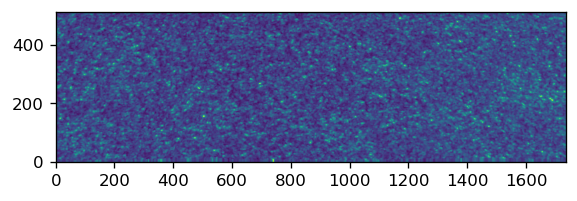

In [7]:
I_cube.plot(wavelength=30)

<WCSAxesSubplot:>

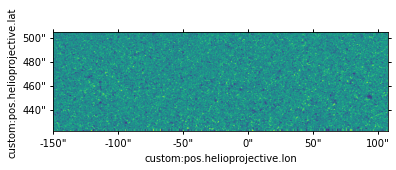

In [7]:
level2_cube.azimuth.plot()

In [100]:
level1_cube.coord1_axis(500)

<SkyCoord (Helioprojective: obstime=2016-07-28T23:58:46.600, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2016-07-28T23:58:46.600, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (0.06217846, 5.58266211, 1.51876022e+11)>): (Tx, Ty) in arcsec
    [(775.49433306,  1034.29546467), (775.49445233,  1033.79114361),
     (775.4945716 ,  1033.28682254), ..., (775.98249858, -1029.92526356),
     (775.98261785, -1030.4295847 ), (775.98273712, -1030.93390584)]>

# Test the inverted magnetic maps

In [70]:
# StokesPy cube with inversion results.
level2_cube = stokespy.MagVectorCube(level2_data, level2_wcs)

print(level2_cube.data.shape)

(3, 4096, 4096)


In [75]:
tt = level2_cube.azimuth

In [77]:
tt.plot()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Functions that calculate Blos and Br

These are copied from Ricky's codes. I am not sure which ones at this point.

In [44]:
x = np.array([1,2,3,-1,5])
mx = np.ma.masked_array(x)

In [48]:
mx

masked_array(data=[ 1,  2,  3, -1,  5],
             mask=False,
       fill_value=999999)

In [ ]:
def calc_Blos(SP_level2, mult_alpha=True, noise_thresh=NOISE_THRESH, degrade_normal=False):
    """Calculate the line of sight and transverse B"""
    B = np.ma.masked_array(SP_level2[1].data)  # Generate an array with a mask (default False)
    
    # Setup a noise threshold
    if noise_thresh > 0 and noise_thresh < 1:
        # threshold by a percentage beyond the mode
        B_mode = modepeak(B)
        noise_thresh = B_mode * (1 + noise_thresh)

    B.mask = B <= noise_thresh  # Apply the mask
    
    # 
    Binc = SP_level2[2].data
    if mult_alpha:
        alpha = SP_level2[12].data
    else:
        alpha = 1
    
    # Take care to ensure floating point arithmetic 
    # doesn't result in negative value for sin(pi)
    sel180 = Binc == 180.
    sinBinc = np.sin(Binc * np.pi / 180.)
    cosBinc = np.cos(Binc * np.pi / 180.)
    sinBinc[sel180] = 0.
    cosBinc[sel180] = -1.
    Blos = alpha * B * cosBinc
    Bperp = np.sqrt(alpha) * B * sinBinc
    
    if degrade_normal and not is_fast(SP_level2):
        Blos = degrade(Blos)
        Bperp = degrade(Bperp)
    return Blos, Bperp

In [ ]:
def calc_Br(SP_level2, mult_alpha=True, noise_thresh=NOISE_THRESH, plane=False, degrade_normal=False):
    Blos, Bperp = calc_Blos(SP_level2, mult_alpha=mult_alpha, noise_thresh=noise_thresh, degrade_normal=degrade_normal)
    if plane:
        x = SP_level2[0].header['XCEN'] # arcsec
        y = SP_level2[0].header['YCEN'] # arcsec
    else:
        x = SP_level2[38].data # arcsec
        y = SP_level2[39].data # arcsec
        if degrade_normal and not is_fast(SP_level2):
            # Average adjacent pixels in X and Y
            x = degrade(x)
            y = degrade(y)
    timestamp = SP_level2[0].header['TSTART'] # TODO: get_header() function
    lon, lat = hproj2hgraph(x, y, timestamp) # degrees
    B0 = sunpy.coordinates.sun.B0(timestamp).deg # degrees
    LOS_angle = (lat - B0) * (np.pi/180.) # radians; angle from LOS to radial vector
    Br = Blos / np.cos(LOS_angle)
    return Br

# Test file sorting routines

In [1]:
import numpy as np
import os
import natsort  # Sorting package

In [2]:
user_dir = os.getcwd() + '/Data/SDO/'

In [3]:
user_dir

'/home/gabriel/Desktop/Science/StokesPY/Data/SDO/'